In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import itertools

In [2]:
data = pd.read_csv('data3a.csv')

In [3]:
data['f_int'] = (data.f == 'T').astype(int)

In [4]:
for i in np.arange(2,7):
    data['x^%d'%(i)] = data.x**(i)

In [5]:
mask = ['x' in col for col in data.columns] 

In [6]:
data.x_c = sm.add_constant(data[data.columns[mask]])

In [7]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Wed, 01 Feb 2017   Deviance:                       79.387
Time:                        21:56:34   Pearson chi2:                     76.7
No. Iterations:                   100                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8185.6246   7764.788      1.054      0.292     -7033.079  2.34e+04
x          -4980.3818   4833.716     -1.030      0.303     -1.45e+04  4493.528
x^2         1251.8054   1245.520      1.005      0.315     -1189.369  3692.980
x^3         -166.4112    170.083     -0.978      0.328      -499.768   166.945
x^4           12.3450     12.985      0.951      0.342       -13.105    37.795
x^5           -0.4847      0.526     -0.922      0.356        -1.515     0.545
x^6            0.0079      0.009      0.893      0.372        -0.009     0.025
==============================================================================
"""

In [9]:
data['predict'] = result.predict()

In [10]:
index_sort = data.sort_values(by='x').index

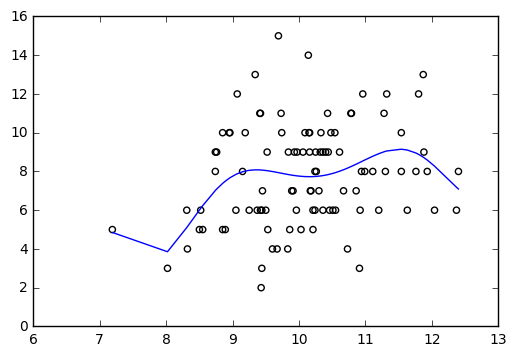

In [11]:
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(data.ix[index_sort].x,data.ix[index_sort].predict)

In [12]:
llh_x = np.sum(stats.poisson.logpmf(data.y,np.exp(1.2917+0.0757*data.x)))

In [13]:
D = -2 * llh_x

In [14]:
print D

470.772607763


In [15]:
llh_full = np.sum(stats.poisson.logpmf(data.y,data.y))
deviance_full = -2 * llh_full 
print(llh_full,deviance_full)

(-192.88975252449595, 385.77950504899189)


In [16]:
residual_deviance = D - deviance_full

In [17]:
residual_deviance

84.993102713809378

In [18]:
summary = []
llh_full = np.sum(stats.poisson.logpmf(data.y,data.y))
k = 100
deviance_full = -2 * llh_full
residual_deviance_full = 0
aic = -2 * (llh_full - k)
summary.append(['full',k,llh_full,deviance_full,residual_deviance_full,aic])

In [19]:
model = sm.GLM(data.y,np.ones(100),family=sm.families.Poisson())
result = model.fit()
summary.append(['const',result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

In [20]:
col = ['x','f_int']
for i in range(2):
    for a in itertools.combinations(col,i+1):
        data.x_c = sm.add_constant(data[list(a)])
        model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
        result = model.fit()
        summary.append([list(a),result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

In [21]:
result_table = pd.DataFrame(summary,columns=['model','k','logL','deviance','residual deviance','AIC'])

In [22]:
result_table

,model,k,logL,deviance,residual deviance,AIC
0,full,100,-192.889753,385.779505,0.000000,585.779505
1,const,1,-237.643221,475.286443,89.506938,477.286443
2,[x],2,-235.386251,470.772502,84.992996,474.772502
3,[f_int],2,-237.627257,475.254514,89.475009,479.254514
4,"[x, f_int]",3,-235.293719,470.587438,84.807933,476.587438


In [23]:
np.random.seed(2)
y = np.random.poisson(8,50)
x = np.random.uniform(-2,2,50)

In [24]:
data.x_c = sm.add_constant(x)
model = sm.GLM(y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -123.68
Date:                Wed, 01 Feb 2017   Deviance:                       54.666
Time:                        21:56:37   Pearson chi2:                     54.4
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0754      0.051     40.708      0.000         1.975     2.175
x1            -0.0417      0.046     -0.913      0.361        -0.131     0.048
==============================================================================
"""

In [25]:
result.aic

251.36653598406369

In [26]:
prediction_x = result.predict()

In [27]:
model = sm.GLM(y,data.x_c[:,0],family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -124.10
Date:                Wed, 01 Feb 2017   Deviance:                       55.497
Time:                        21:56:37   Pearson chi2:                     54.7
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0669      0.050     41.078      0.000         1.968     2.165
==============================================================================
"""

In [28]:
result.aic

250.197522947187

In [29]:
prediction_const = result.predict()

In [30]:
sort_arg = x.argsort()

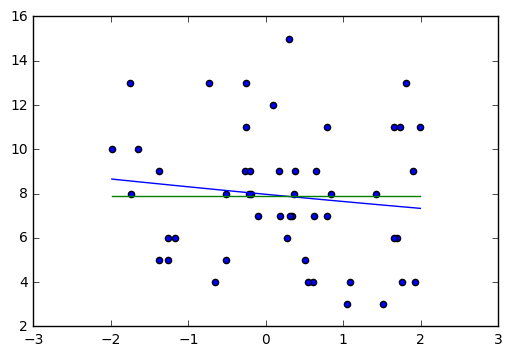

In [31]:
plt.scatter(x,y)
plt.plot(x[sort_arg],prediction_x[sort_arg])
plt.plot(x[sort_arg],prediction_const[sort_arg])

In [32]:
lambdas = np.arange(1.8,2.2,0.01)
llhs = np.array([np.sum(stats.poisson.logpmf(y,np.exp(lam))) for lam in lambdas])

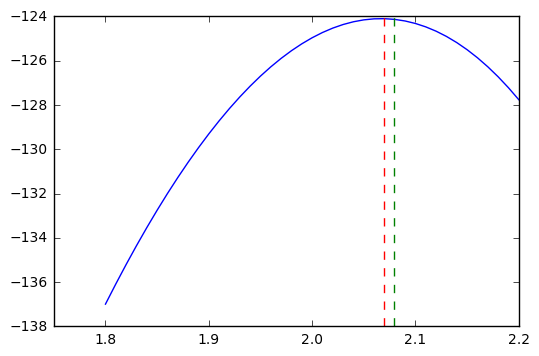

In [33]:
plt.plot(lambdas,llhs)
plt.axvline(lambdas[np.argmax(llhs)],ls='--',c='r')
plt.axvline(np.log(8),ls='--',c='g')

In [34]:
test_data = np.random.poisson(8,[200,50])

In [35]:
llhs_test = np.array([np.sum(stats.poisson.logpmf(test,np.exp(2.0669))) for test in test_data])

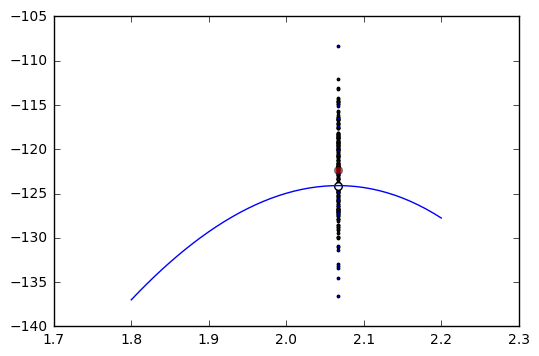

In [36]:
plt.plot(lambdas,llhs)
plt.scatter(np.ones(test_data.shape[0])*2.0669,llhs_test,s=3)
plt.scatter(2.0669,llhs_test.mean(),s=30,c='r',alpha=0.5)
plt.scatter(2.0669,-124.1,c='w',s=30)

In [37]:
np.random.seed(2)
y_ob = np.random.poisson(8,[12,50])
x_ob = np.random.uniform(-2,2,[12,50])
const = np.ones(50)

test_data = np.random.poisson(8,[12,200,50])

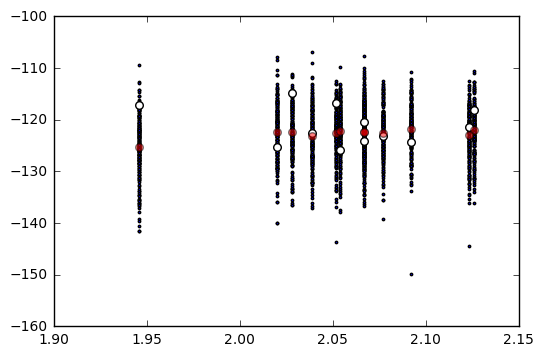

In [38]:
llhs = []
params = []
llhs_mean = []

for i in range(12):
    model = sm.GLM(y_ob[i],const,family=sm.families.Poisson())
    result = model.fit()
    param = result.params[0]
    llhs.append(result.llf)
    params.append(param)
    
    test = np.array([np.sum(stats.poisson.logpmf(test,np.exp(param))) for test in test_data[i]])
    llhs_mean.append(test.mean())
    plt.scatter(param*np.ones(test.shape[0]),test,s=3)
    
plt.scatter(params,llhs,c='w',s=30)
plt.scatter(params,llhs_mean,c='r',s=30,alpha=0.5)

In [39]:
np.random.seed(2)
y_ob = np.random.poisson(8,[100,50])
const = np.ones(50)

test = np.random.poisson(8,[100,200,50])

In [40]:
llh_diff = []
for i in range(100):
    model = sm.GLM(y_ob[i],const,family=sm.families.Poisson())
    result = model.fit()
    llh = result.llf
    param = result.params[0]
    
    test_llh = np.array([np.sum(stats.poisson.logpmf(te,np.exp(param))) for te in test[i]])
    llh_mean = test_llh.mean()
    llh_diff.append(llh-llh_mean)
    

1.04200796029


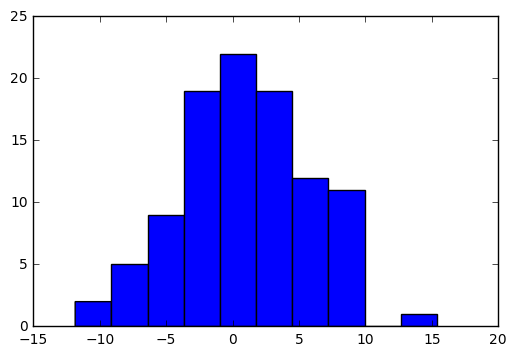

In [41]:
plt.hist(llh_diff)
print(np.mean(llh_diff))

In [42]:
np.random.seed(3)

y_ob = np.random.poisson(8,[200,50])
x_ob = np.random.uniform(-2,2,[200,50])
const = np.ones(50)

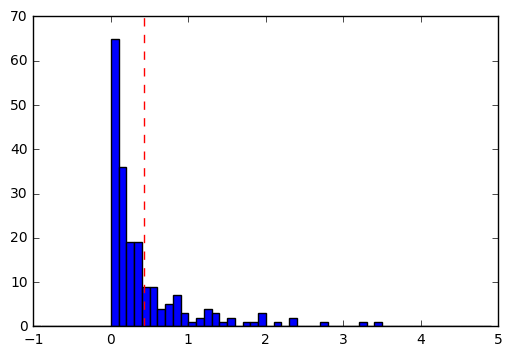

In [44]:
llf_diff = []
for i in range(200):
    model = sm.GLM(y_ob[i],const,family=sm.families.Poisson())
    result = model.fit()
    llf_c = result.llf
    
    x_c = sm.add_constant(x_ob[i])
    model = sm.GLM(y_ob[i],x_c,family=sm.families.Poisson())
    result = model.fit()
    llf_x = result.llf
    
    llf_diff.append(llf_x-llf_c)
    
plt.hist(llf_diff,bins=np.arange(-1,5,0.1))
plt.axvline(np.mean(llf_diff),c='r',ls='--')

In [46]:
y_ob = np.random.poisson(8,[200,50])
x_ob = np.random.uniform(-2,2,[200,50])
const = np.ones(50)

y_test = np.random.poisson(8,[200,200,50])
x_test = np.random.uniform(-2,2,[200,200,50])

In [48]:
mean_diff = []
bias_diff = []

for i in range(y_ob.shape[0]):
    model = sm.GLM(y_ob[i],const,sm.families.Poisson())
    result = model.fit()
    param_c = result.params[0]
    
    llfs_c = np.array([np.sum(stats.poisson.logpmf(test,np.exp(param_c))) for test in y_test[i]])
    mean_llf_c = llfs_c.mean()
    bias_c = result.llf - mean_llf_c
    
    x_c = sm.add_constant(x_ob[i])
    model = sm.GLM(y_ob[i],x_c,family=sm.families.Poisson())
    result = model.fit()
    b1,b2 = result.params
    
    llfs_x = np.array([np.sum(stats.poisson.logpmf(test1,np.exp(b1+b2*test2))) for test1,test2 in zip(y_test[i],x_test[i])])
    mean_llf_x = llfs_x.mean()
    bias_x = result.llf - mean_llf_x
    
    mean_diff.append(mean_llf_x - mean_llf_c)
    bias_diff.append(bias_x - bias_c)

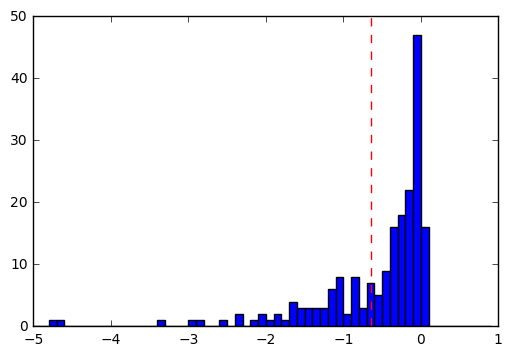

In [49]:
plt.hist(mean_diff,bins=np.arange(-5,1,0.1))
plt.axvline(np.mean(mean_diff),ls='--',c='r')

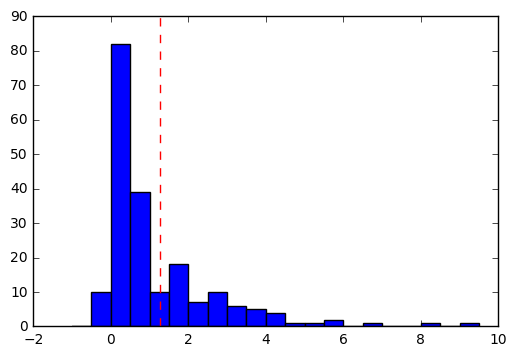

In [52]:
plt.hist(bias_diff,bins=np.arange(-1,10,0.5))
plt.axvline(np.mean(bias_diff),ls='--',c='r')